In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import transforms, ticker, pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import math
%matplotlib inline

/home/andrey/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [117]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [3]:
x = tf.placeholder(tf.float64, shape=[None])
y = 1/x + tf.sqrt(10*x)

g = tf.gradients(y, x)[0]
h = tf.hessians(y, x)[0]

In [4]:
nPoints = 100
x_vals = np.linspace(0.3, 1.5, nPoints)
x0 = 0.4

In [5]:
session = tf.Session()
y_vals = session.run(y, {x: x_vals})
y0 = session.run(y, {x: [x0]})
g0, h0 = session.run([g, h], {x: [x0]})
g0 = g0[0]
h0 = h0[0, 0]

fLinApprox = lambda x: y0 + g0*(x - x0)
fQuadApprox = lambda x: y0 + g0*(x - x0) + 1/2*h0*(x - x0)**2

quadMin_x = x0 - g0/h0
quadMin_y = fQuadApprox(quadMin_x)

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.65,4.36,'Квадратичная аппроксимация')

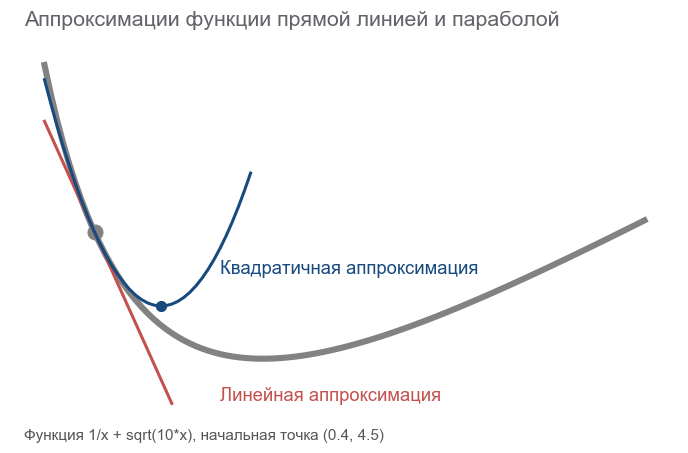

In [6]:
# create new figure
fig, ax1 = plt.subplots(figsize=(6, 6), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0, right=1, top=0.751, bottom=0.187)

# draw received tickets line with markers
ax1.plot(x_vals, y_vals, linewidth=4, color=GRAY6)
ax1.scatter([x0], [y0], s=90, color=GRAY6, clip_on=False)

ax1.plot(x_vals[:22], fLinApprox(x_vals[:22]), linewidth=2, color=RED1)
ax1.plot(x_vals[:35], fQuadApprox(x_vals[:35]), linewidth=2, color=BLUE1)
ax1.scatter([quadMin_x], [quadMin_y], s=40, color=BLUE1, clip_on=False)

# remove chart border
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.text(0.26, 5.2, 'Аппроксимации функции прямой линией и параболой', fontsize=14, color=GRAY4)
ax1.text(0.26, 3.8, 'Функция 1/x + sqrt(10*x), начальная точка (0.4, 4.5)', fontsize=10, color=GRAY3)
ax1.text(0.65, 3.93, 'Линейная аппроксимация', fontsize=12, color=RED1)
ax1.text(0.65, 4.36, 'Квадратичная аппроксимация', fontsize=12, color=BLUE1)

In [7]:
x = tf.placeholder(tf.float64, shape=[None, 2])
y = (1 - x[:,0])**2 + 100*(x[:,1] - x[:,0]**2)**2

g = tf.gradients(y, x)[0]
h = tf.hessians(y, x)[0]

In [8]:
x_grid, y_grid = np.meshgrid(np.arange(-2, 2.1, 0.2), 
                             np.arange(-6, 4.1, 0.2))
x_vals = np.stack([x_grid.ravel(), y_grid.ravel()]).T

In [9]:
session = tf.Session()
y_vals = session.run(y, {x: x_vals})
z_grid = y_vals.reshape(x_grid.shape)

x0 = np.array([0, -5])
y0 = session.run(y, {x: [x0]})[0]
g0, h0 = session.run([g, h], {x: [x0]})
h0 = np.squeeze(h0)

In [10]:
fLinApprox = lambda x: y0 + g0.dot((x - x0).T)
fQuadApprox = lambda x: y0 + g0.dot((x - x0).T) + 1/2*(x - x0).dot(h0).dot((x - x0).T)
x_grid_l, y_grid_l = np.meshgrid(np.arange(-0.8, 0.81, 0.2), 
                                 np.arange(-6, -2, 0.2))
x_vals_l = np.stack([x_grid_l.ravel(), y_grid_l.ravel()]).T
z_grid_l = fLinApprox(x_vals_l).reshape(x_grid_l.shape)

x_grid_q, y_grid_q = np.meshgrid(np.arange(-1.2, 1.21, 0.2), 
                                 np.arange(-6, 4.1, 0.2))
x_vals_q = np.stack([x_grid_q.ravel(), y_grid_q.ravel()]).T
z_grid_q = np.array([fQuadApprox(np.array([x_vals_q[i]]))[0] for i in range(len(x_vals_q))]).reshape(x_grid_q.shape)

In [11]:
quadMin_x = x0 - inv(h0).dot(g0.T).T
quadMin_y = fQuadApprox(quadMin_x)
quadMin_x = quadMin_x[0]

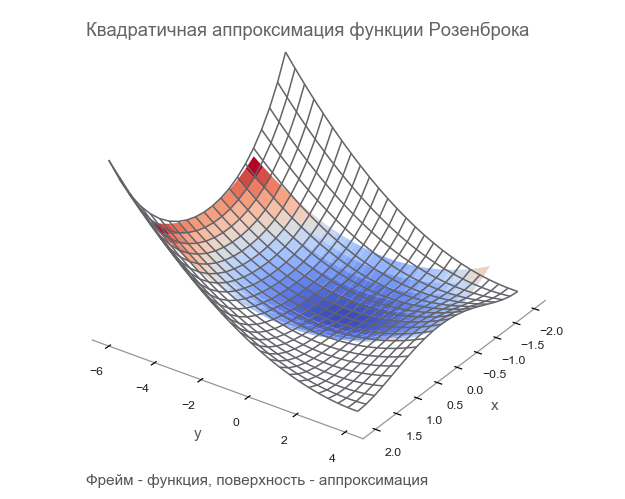

In [102]:
from matplotlib import cm
fig = plt.figure(figsize=(7, 5), dpi=110)
ax = fig.add_subplot(111, projection='3d')
# configure tick labels appearance
fig.subplots_adjust(bottom=0.1, top=0.9)
for i in ax.get_yticklabels() + ax.get_xticklabels() + ax.get_zticklabels():
    i.set_fontsize(8)
    i.set_color(GRAY1)
ax.view_init(40, 35)
ax.plot_wireframe(x_grid, y_grid, z_grid, linewidth=1, color=GRAY4)

ax.grid(False)
ax.set_zticks([])
ax.w_zaxis.line.set_lw(0.)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('x', color=GRAY3)
ax.set_ylabel('y', color=GRAY3)
ax.w_xaxis.line.set_color(GRAY7)
ax.w_yaxis.line.set_color(GRAY7)
ax.w_zaxis.line.set_color(GRAY7)
for i in ax.get_yticklabels() + ax.get_xticklabels() + ax.get_zticklabels():
    i.set_fontsize(8)
    i.set_color(GRAY1)
ax.text2D(0.12, 0.95, 'Квадратичная аппроксимация функции Розенброка', color=GRAY4,
          fontsize=12, transform=ax.transAxes)
ax.text2D(0.12, -0.07, 'Фрейм - функция, поверхность - аппроксимация', fontsize=10, 
          color=GRAY3, transform=ax.transAxes)    


#ax.plot_surface(x_grid_l, y_grid_l, z_grid_l, color=BLUE1, alpha=0.6)
ax.plot_surface(x_grid_q, y_grid_q, z_grid_q, cmap=cm.coolwarm, shade=False)
ax.scatter(*x0, y0, s=90, color=GRAY4, zorder=5)

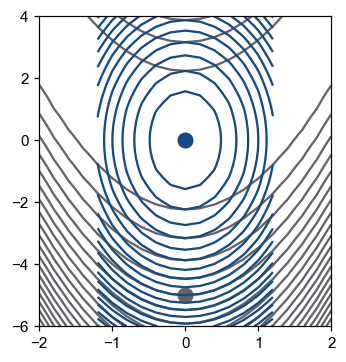

In [97]:
# create new figure
fig, ax1 = plt.subplots(figsize=(4, 5), # width, height in inches
                        dpi=110)        # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.scatter(*x0, s=90, color=GRAY4)
ax1.scatter(*quadMin_x, s=90, color=BLUE1)
ax1.contour(x_grid, y_grid, z_grid, 20, colors=GRAY4)
#ax1.contour(x_grid_l, y_grid_l, z_grid_l, 20, colors=RED1)
ax1.contour(x_grid_q, y_grid_q, z_grid_q, 20, colors=BLUE1)

In [14]:
def rosenbrock(x, y, a, b):
    return (a - x)**2 + b*(y - x**2)**2

In [15]:
x_grid, y_grid = np.meshgrid(np.arange(-2, 2.1, 0.2), 
                             np.arange(-1, 3.1, 0.2))
z_grid = rosenbrock(x_grid, y_grid, 1, 100)

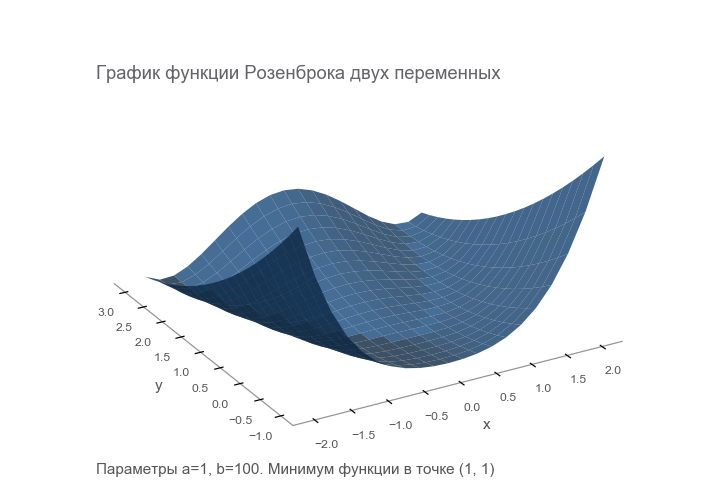

In [16]:
fig = plt.figure(figsize=(8, 5), dpi=110)
fig.subplots_adjust(bottom=0.1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, -120)
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.8, color=BLUE1)
ax.text2D(0.12, 0.85, 'График функции Розенброка двух переменных', color=GRAY4, 
          fontsize=12,
          transform=ax.transAxes)
ax.text2D(0.12, -0.07,
           'Параметры а=1, b=100. Минимум функции в точке (1, 1)',
           fontsize=10,
           color=GRAY3,
           transform=ax.transAxes)
ax.grid(False)
ax.set_zticks([])
ax.w_zaxis.line.set_lw(0.)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('x', color=GRAY3)
ax.set_ylabel('y', color=GRAY3)
ax.w_xaxis.line.set_color(GRAY7)
ax.w_yaxis.line.set_color(GRAY7)
ax.w_zaxis.line.set_color(GRAY7)
for i in ax.get_yticklabels() + ax.get_xticklabels() + ax.get_zticklabels():
    i.set_fontsize(8)
    i.set_color(GRAY3)

In [29]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [16]:
x = tf.placeholder(tf.float64, shape=[None])
y = x**2
x_vals = np.linspace(-2, 2, nPoints)
y_vals = session.run(y, {x: x_vals})
x0, y0 = x_vals[20], y_vals[20]

In [17]:
x_steps_vals, y_steps_vals = [[x0], [x0], [x0]], [[y0], [y0], [y0]]

In [18]:
for i, lr in enumerate([0.03, 0.2, 1.05]):
    x = tf.Variable([x0], dtype=tf.float64)
    y = x**2
    g = tf.gradients(y, x)[0]
    opt = tf.train.GradientDescentOptimizer(learning_rate=1)
    sgd = opt.apply_gradients([(lr*g, x)]) # 0.03 -small # 0.2 -norm # 1.05 - big
    session.run(tf.global_variables_initializer())
    for k in range(5):
        session.run(sgd)
        x_steps_vals[i].append(session.run(x)[0])
        y_steps_vals[i].append(session.run(y)[0])    

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(-2.3,-0.6,'Работа алгоритма градиентного спуска на параболе из точки (-1.2, 1.42). Вариатны скорости обучения: 0.03, 0.2, 1.05')

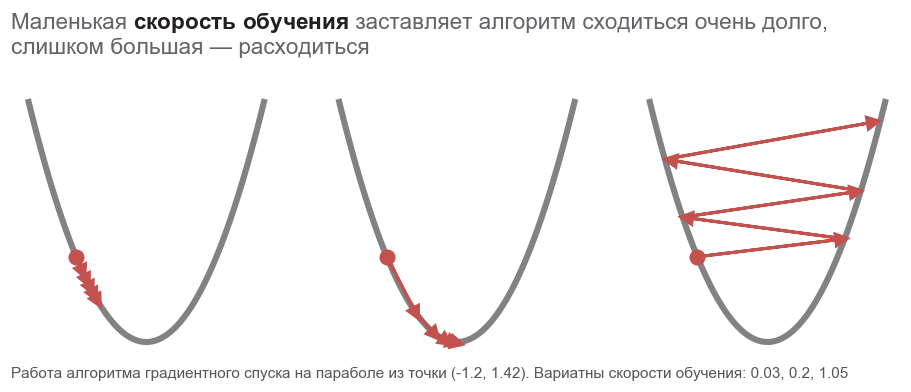

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, 
                                    figsize=(8, 4), dpi=110)

fig.subplots_adjust(left=0, right=1, top=0.6, bottom=0)

for i, ax in enumerate([ax1, ax2, ax3]):
    ax.plot(x_vals, y_vals, linewidth=4, color=GRAY6, zorder=1)
    ax.scatter([x0], [y0], s=90, color=RED1, zorder=2)
    for p in range(len(x_steps_vals[i])-1):
        x_s, y_s, x_f, y_f = x_steps_vals[i][p], y_steps_vals[i][p], x_steps_vals[i][p+1], y_steps_vals[i][p+1]
        ax.arrow(x_s, y_s, (x_f-x_s)*0.94, (y_f-y_s)*0.94, linewidth=2, color=RED1, head_width=0.2, head_length=0.2)

    ax.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
    for spine in ax.spines.values():
        spine.set_visible(False)
#fig.text(0.11, 0.9, 'График функции Розенброка двух переменных', color=GRAY4, fontsize=12)
rainbow_text(-2.3, 4.8,
             'Маленькая ||$\\bf{скорость\ обучения}$||'
             ' заставляет алгоритм сходиться очень долго, \n'
             'слишком большая — расходиться',
             [[GRAY4, GRAY1, GRAY4], [GRAY4]],
             spacing=25,
             ax=ax1,
             fontsize=14.7)
ax1.text(-2.3, -0.6, 'Работа алгоритма градиентного спуска на параболе из точки (-1.2, 1.42). Вариатны скорости обучения: 0.03, 0.2, 1.05', fontsize=10, color=GRAY3)    


In [48]:
x0, y0

(-1.1919191919191918, 1.4206713600652991)

In [3]:
def rosenbrock(x, y, a, b):
    return (a - x)**2 + b*(y - x**2)**2

Text(0.05,-0.07,'Минимум находится в точке (2.5, 2.5) и равен 0')

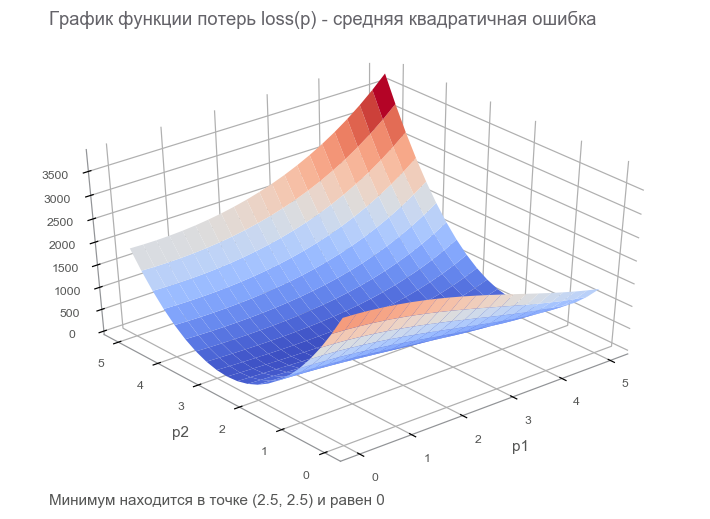

In [4]:
from matplotlib import cm
data_points = np.array([[x, y, rosenbrock(x, y, 2.5, 2.5)]
                       for x in np.arange(-2, 2.1, 2) 
                       for y in np.arange(-2, 2.1, 2)])
m = data_points.shape[0]
x, y = data_points[:, 0], data_points[:, 1]
z = data_points[:, 2]


a_grid, b_grid = np.meshgrid(np.arange(0, 5.1, 0.25), 
                             np.arange(0, 5.1, 0.25))
loss_grid = np.zeros(shape=a_grid.shape)
for i in range(a_grid.shape[0]):
    for j in range(a_grid.shape[1]):
        loss_grid[i, j] = np.mean((z-rosenbrock(x, y, a_grid[i,j], b_grid[i,j]))**2)


fig = plt.figure(figsize=(8, 5), dpi=110)
fig.subplots_adjust(bottom=0.1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 230)
ax.plot_surface(a_grid, b_grid, loss_grid, cmap=cm.coolwarm)

#ax.grid(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('p1', color=GRAY3)
ax.set_ylabel('p2', color=GRAY3)
ax.w_xaxis.line.set_color(GRAY7)
ax.w_yaxis.line.set_color(GRAY7)
ax.w_zaxis.line.set_color(GRAY7)
for i in ax.get_yticklabels() + ax.get_xticklabels() + ax.get_zticklabels():
    i.set_fontsize(8)
    i.set_color(GRAY3)
    
ax.text2D(0.05, 1.05, 'График функции потерь loss(p) - средняя квадратичная ошибка', color=GRAY4, 
          fontsize=12,
          transform=ax.transAxes)
ax.text2D(0.05, -0.07,
           'Минимум находится в точке (2.5, 2.5) и равен 0',
           fontsize=10,
           color=GRAY3,
           transform=ax.transAxes)

In [5]:
data_points = np.array([[x, y, rosenbrock(x, y, 2.5, 2.5)]
                       for x in np.arange(-2, 2.1, 2) 
                       for y in np.arange(-2, 2.1, 2)])
m = data_points.shape[0]
x = tf.placeholder(tf.float64, shape=[m, 2])
y = tf.placeholder(tf.float64, shape=[m])
p = tf.Variable([5., 5.], dtype=tf.float64)
y_hat = rosenbrock(x[:, 0], x[:, 1], p[0], p[1])
r = y - y_hat
loss = tf.reduce_mean(r**2)
feed_dict = {x: data_points[:,0:2], y: data_points[:,2]}
session = tf.Session()
session.run(tf.global_variables_initializer())
current_loss = session.run(loss, feed_dict)
lst = [(5., 5)]
def train(target_loss, max_steps, loss_tensor, train_step_op, inputs):
    step = 0
    current_loss = session.run(loss_tensor, inputs)
    while current_loss > target_loss and step < max_steps:
        step += 1
        session.run(train_step_op, inputs)
        current_loss = session.run(loss_tensor, inputs)
        a, b = session.run(p, inputs)
        lst.append((a, b))
opt = tf.train.GradientDescentOptimizer(learning_rate=1)
grad = tf.gradients(loss, p)[0]
j = tf.stack([tf.gradients(r_i, p)[0]
              for r_i in tf.unstack(r)])
jT = tf.transpose(j)
r_col = tf.expand_dims(r, -1)
hess_approx = tf.matmul(jT, j)
grad_approx = tf.matmul(jT, r_col)
dp = tf.matmul(tf.linalg.inv(hess_approx), grad_approx)
dp = tf.squeeze(dp)
ng = opt.apply_gradients([(dp, p)])
session.run(tf.global_variables_initializer())
train(1e-10, 40000, loss, ng, feed_dict)

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,-0.3,'4 шага до минимума')

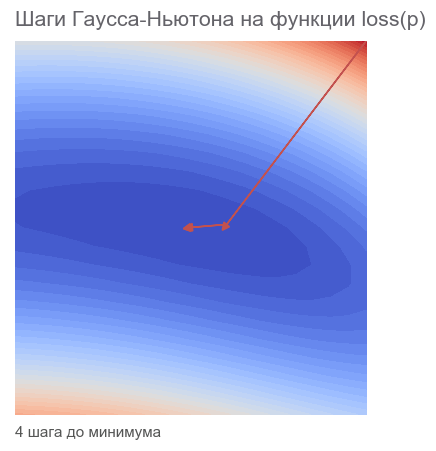

In [9]:
fig, ax = plt.subplots(figsize=(3.2, 4),
                        dpi=110)
fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.05)
ax.contourf(a_grid, b_grid, loss_grid, 40, cmap=cm.coolwarm)
for p in range(len(lst)-1):
    x_s, y_s, x_f, y_f = *lst[p], *lst[p+1]
    ax.arrow(x_s, y_s, x_f-x_s, y_f-y_s, linewidth=1, color=RED1, head_width=0.1, head_length=0.1)
ax.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.text(0, 5.2, 'Шаги Гаусса-Ньютона на функции loss(p)', fontsize=14, color=GRAY4)
ax.text(0, -0.3, '4 шага до минимума', fontsize=10, color=GRAY3)

In [7]:
len(lst)

5

In [94]:
import pandas as pd
from datetime import timedelta

In [95]:
df1 = pd.read_csv("log1.txt", header=None, delimiter=r"\s+", skiprows=1)
df2 = pd.read_csv("log2.txt", header=None, delimiter=r"\s+", skiprows=1)
df3 = pd.read_csv("log4.txt", header=None, delimiter=r"\s+", skiprows=1)

In [96]:
df1 = df1.rename(columns={0: 'steps', 1:'seconds', 2:'loss'})[['steps', 'seconds', 'loss']]
df2 = df2.rename(columns={0: 'steps', 1:'seconds', 2:'loss'})[['steps', 'seconds', 'loss']]
df3 = df3.rename(columns={0: 'steps', 1:'seconds', 2:'loss'})[['steps', 'seconds', 'loss']]

df1 = df1[df1.seconds < 12600]
df2 = df2[df2.seconds < 12600]
df3 = df3[df3.seconds < 12600]
#df1['time'] = pd.to_datetime(df1['seconds'], unit='m')
#timedelta(int(df1['seconds'].values[10]))
x1 = df1['seconds'].values
y1 = df1['loss'].values

x2 = df2['seconds'].values
y2 = df2['loss'].values

x3 = df3['seconds'].values
y3 = df3['loss'].values

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


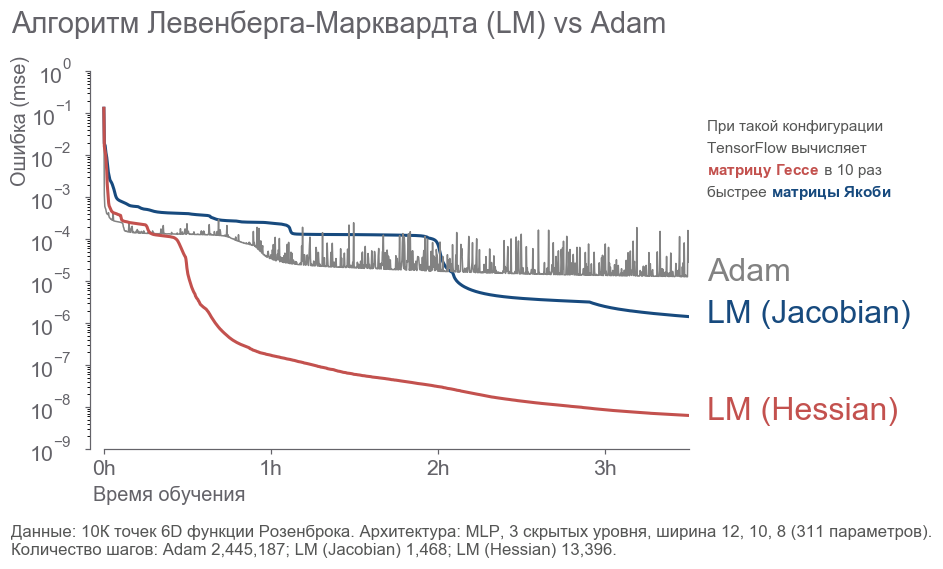

In [148]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09),
                        dpi=110)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.set_yscale('log')
ax1.plot(x1, y1, linewidth=2, color=BLUE1)
ax1.plot(x2, y2, linewidth=1, color=GRAY6)
ax1.plot(x3, y3, linewidth=2, color=RED1)

plt.setp(ax1,
         xticks=np.arange(0, 14000, 3600),
         xticklabels=['0h', '1h', '2h', '3h'])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY4)
ax1.spines['left'].set_color(GRAY4)

for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY4)

for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
    
ax1.text(13000, 1e-5, 'Adam', fontsize='21', color=GRAY6)
ax1.text(13000, 1e-6, 'LM (Jacobian)', fontsize='21', color=BLUE1)
ax1.text(13000, 5e-9, 'LM (Hessian)', fontsize='21', color=RED1)

ax1.set_xlim([-300, 12600])
ax1.set_ylim([1e-9, 1])
ax1.spines['bottom'].set_bounds(0, 12600)

ax1.text(-2000, 1, 'Ошибка (mse)', fontsize=13, rotation='vertical',
         color=GRAY4)
ax1.text(-230, 0.6e-10, 'Время обучения', fontsize=13, color=GRAY4)

ax1.text(-2000, 3e-12,
         'Данные: 10К точек 6D функции Розенброка. '
         'Архитектура: MLP, 3 скрытых уровня, ширина 12, 10, 8 (311 параметров).\n'
         'Количество шагов: Adam 2,445,187; LM (Jacobian) 1,468; LM (Hessian) 13,396.',
         fontsize=11, color=GRAY3, linespacing=1.3)

ax1.text(-2000, 8, 'Алгоритм Левенберга-Марквардта (LM) vs Adam', fontsize=19, color=GRAY4)

rainbow_text(
    13000, 1e-3,
    'При такой конфигурации\nTensorFlow вычисляет\n'
    '$\\bf{матрицу\ Гессе}$|| в 10 раз\nбыстрее ||$\\bf{матрицы\ Якоби}$',
    [[GRAY3], [GRAY3], [RED1, GRAY3], [GRAY3, BLUE1]],
    spacing=22,
    ax=ax1,
    fontsize=10)